## Plan du TP :

Expliquer les concepts de variance, covariance et corrélation.</br></br>
Présenter l'ACP comme une méthode de réduction de dimensionnalité.</br></br>
Discuter de l'importance de la standardisation des données.

<b/>
Exercice 1 : Chargement et standardisation des données</br>
Objectif : Charger le dataset Wine (sklearn.datasets) et le standardiser.

In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Chargement du dataset Wine
import pandas as pd
dataset = load_wine()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

df.shape

(178, 13)

In [3]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
# Standardisation des données
df_std = StandardScaler().fit_transform(df)

<b>Exercice 2 : Calcul de la matrice de covariance</br>
Objectif : Calculer et visualiser la matrice de covariance des données standardisées.   
    

In [5]:
# Calcul de la matrice de covariance
cov_matrix = np.cov(df_std, rowvar=False)
# Visualisation de la matrice de covariance
print(cov_matrix)

[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909]
 [ 0.23815287 -0.413328

<b>Exercice 3 : Application de l'ACP</br>
Objectif : Appliquer l'ACP et interpréter les valeurs propres et les vecteurs propres.

In [6]:
df_std.shape

(178, 13)

In [7]:
from sklearn.decomposition import PCA

# Application de l'ACP
pca = PCA(n_components=df_std.shape[1])
pca.fit(df_std)
# Affichage des valeurs propres
print("\nValeurs propres : \n ", pca.singular_values_)
# Affichage des vecteurs propres
print("\nVecteurs propres : \n ", pca.components_)


Valeurs propres : 
  [28.94203422 21.08225141 16.04371561 12.78973645 12.32374195 10.68713954
  9.90368818  7.8760733   7.17081793  6.6828618   6.33958815  5.48097635
  4.28967045]

Vecteurs propres : 
  [[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]
 [-0.0178563   0.53689028 -0.21417556  0.06085941 -0.35179658  0.19806835
   0.15229479 -0.20330102  0.39905653  0.06592568 -0.42777141  0.18412074
  -0.23207086]
 [-0.26566365  0.03521363 -0.14302547  0.06610294  0.72704851 -0.14931841
  -0.10902584 -0.50070298  0.13685982 -0.07643678 -0.17361452 -0.1011

<b>Exercice 4 : Projection sur les deux premiers axes</br>
Objectif : Visualiser les données projetées sur les deux premières composantes principales.

In [8]:
pca.components_[:,:2]

array([[ 0.1443294 , -0.24518758],
       [-0.48365155, -0.22493093],
       [-0.20738262,  0.08901289],
       [-0.0178563 ,  0.53689028],
       [-0.26566365,  0.03521363],
       [-0.21353865, -0.53681385],
       [-0.05639636,  0.42052391],
       [-0.39613926, -0.06582674],
       [ 0.50861912, -0.07528304],
       [ 0.21160473, -0.30907994],
       [-0.22591696,  0.07648554],
       [-0.26628645,  0.12169604],
       [ 0.01496997,  0.02596375]])

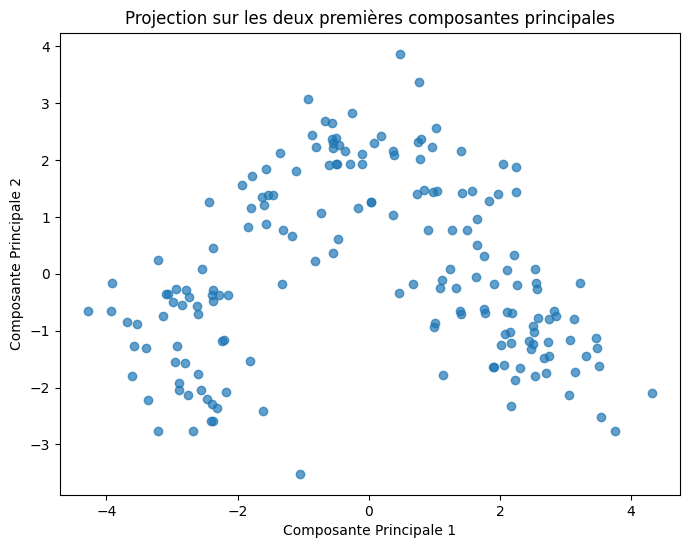

In [9]:
#Projection des données
data_pca = pca.transform(df_std)
data_pca_2D = data_pca[:, :2]  # garder que les 2 premiers axes

# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(data_pca_2D[:, 0], data_pca_2D[:, 1], alpha=0.7)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection sur les deux premières composantes principales')
plt.show()

<b>Exercice 5 : Interprétation des axes</br>
Objectif : Interpréter les composantes principales en fonction des vecteurs propres.

On distingue ici 3 clusters répartis sous forme d'une parabole centrée autour de 0. Le 1er cluster a une valeur élevée sur la composante principale 2 bien qu'il soit négatif sur la composante principale 1 (-4). Le 2ème cluster a une valeur faible sur les 2 composantes principales tandis que le 3ème cluster a une valeur élevée sur les 2 composantes principales. 

Après analyse, le premier cluster correspond aux vins ayant une faible valeur de flavanoids mais à une grande concentration d'alcool et une forte réflexion à la couleur. Le troisieme cluster correspond aux vins ayant un fort taux de phénols

